# Convert cisTopic objects to pycisTopic objects

In [1]:
# Packages
suppressPackageStartupMessages(library(cisTopic))
suppressPackageStartupMessages(library(arrow))

# set random seed for reproducibility
set.seed(12345)

Warning message:
“replacing previous import ‘GenomicRanges::shift’ by ‘data.table::shift’ when loading ‘cisTopic’”
Warning message:
“replacing previous import ‘data.table::last’ by ‘dplyr::last’ when loading ‘cisTopic’”
Warning message:
“replacing previous import ‘GenomicRanges::union’ by ‘dplyr::union’ when loading ‘cisTopic’”
Warning message:
“replacing previous import ‘GenomicRanges::intersect’ by ‘dplyr::intersect’ when loading ‘cisTopic’”
Warning message:
“replacing previous import ‘GenomicRanges::setdiff’ by ‘dplyr::setdiff’ when loading ‘cisTopic’”
Warning message:
“replacing previous import ‘data.table::first’ by ‘dplyr::first’ when loading ‘cisTopic’”
Warning message:
“replacing previous import ‘data.table::between’ by ‘dplyr::between’ when loading ‘cisTopic’”
Warning message:
“replacing previous import ‘dplyr::failwith’ by ‘plyr::failwith’ when loading ‘cisTopic’”
Warning message:
“replacing previous import ‘dplyr::id’ by ‘plyr::id’ when loading ‘cisTopic’”
Warning message:
“

In [3]:
# Define paths
cisTopic_rds <- "/cellar/users/aklie/data/ml4gland/collabs/er_stress_regulation/test.cisTopic.rds"
outDir <- "/cellar/users/aklie/data/ml4gland/collabs/er_stress_regulation"
dataset_name = "test_script"
numTopics = 42
subset = "FALSE"

In [4]:
# Load cisTopic object
print(paste("Loading cisTopic object from", cisTopic_rds))
cisTopic_obj = readRDS(cisTopic_rds)

[1] "Loading cisTopic object from /cellar/users/aklie/data/ml4gland/collabs/er_stress_regulation/test.cisTopic.rds"


In [5]:
if (subset == TRUE) {
    cellData <- cisTopic_obj@cell.data[cells, ]
} else {
    cellData <- cisTopic_obj@cell.data
}
write.table(cellData, file=file.path(outDir, paste0(dataset_name, ".cellData.tsv")), sep="\t", quote=FALSE)

In [ ]:
# Select the correct model for the number of topics
cisTopic_obj <- selectModel(cisTopic_obj, select = numTopics, type="maximum")
modelDims <- dim(cisTopic_obj@selected.model$topics)
print(paste("Selected model with", numTopics, "topics and matrix dimensions of", modelDims[1], "x", modelDims[2]))

In [132]:
# Save the region probability matrix
regionMatrixPath <- file.path(outDir, paste0(dataset_name, ".regionMat.feather"))
regionMat <- modelMatSelection(cisTopic_obj, 'region', 'Probability', all.regions=TRUE)
regionMat <- as.data.frame(regionMat)
print(paste("Saving region probability matrix with dimensions of", dim(regionMat)[1], "x", dim(regionMat)[2], "to", regionMatrixPath))
write_feather(regionMat, sink=file.path(outDir, paste0(dataset_name, ".regionMat.feather")))
write.table(cisTopic_obj@region.data, file=file.path(outDir, paste0(dataset_name, ".regionData.tsv")), sep="\t", quote=FALSE)

[1]    32 46731
[1] "Saving region probability matrix with dimensions of 32 x 46731 to /cellar/users/aklie/data/ml4gland/collabs/er_stress_regulation/test_script.regionMat.feather"


ERROR: Error in is.data.frame(x): object 'cisTopic_obj.region.data' not found


In [114]:
# Get random barcodes to subset the number of cells to based on the subset argument
if (subset == TRUE) {
    print("Subsetting the number of cells to 100, all objects will be saved with this many cells")
    cells <- sample(rownames(cisTopic_obj@cell.data), 100)
}

[1] "Subsetting the number of cells to 100, all objects will be saved with this many cells"


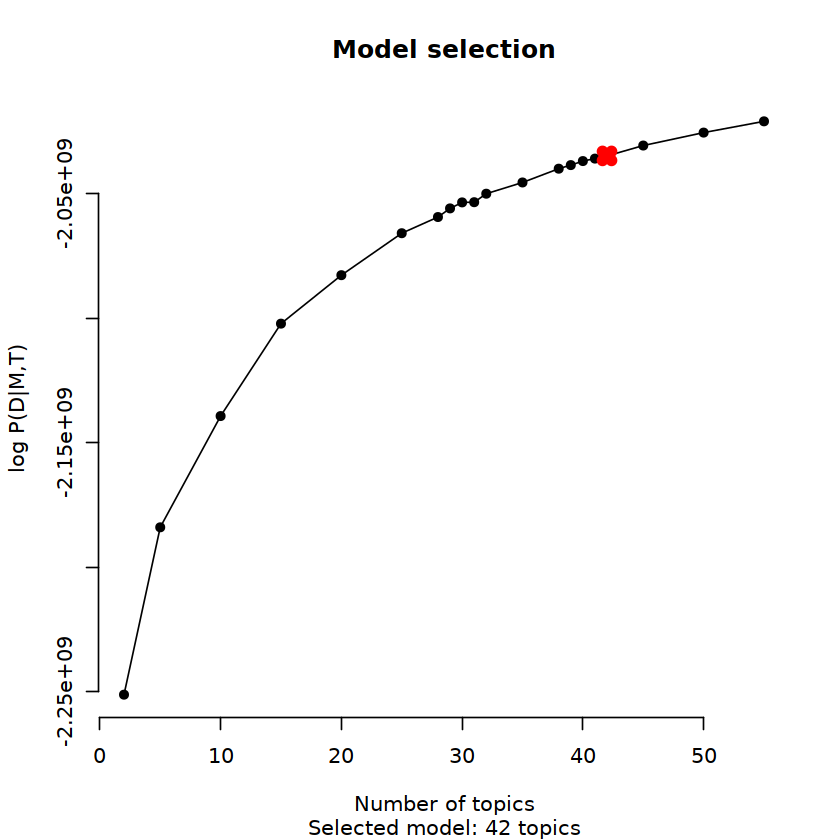

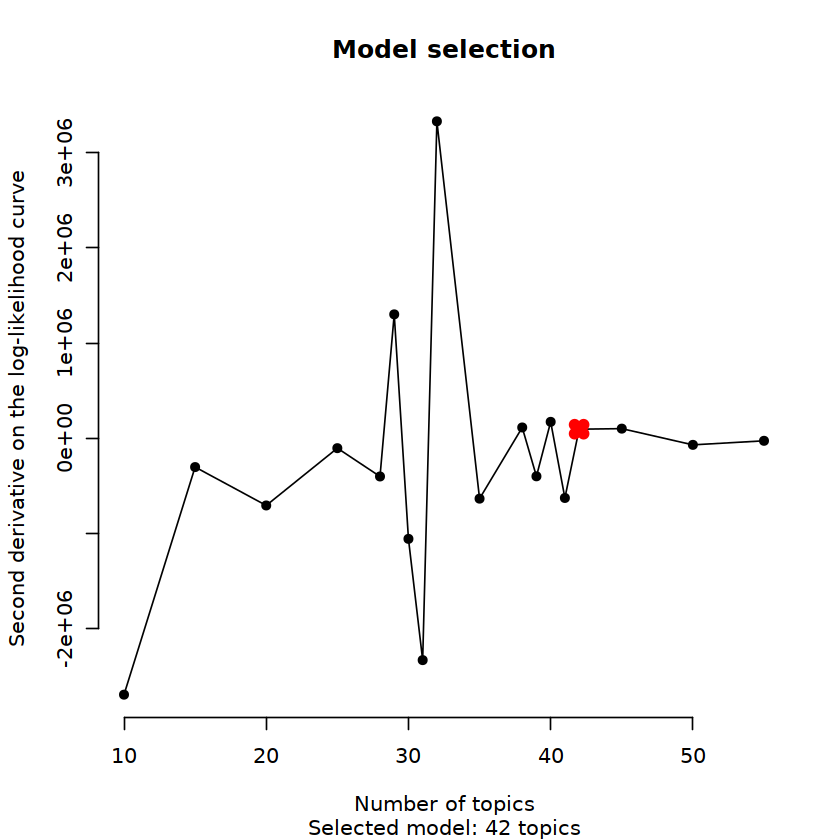

[1] "Selected model with 42 topics and matrix dimensions of 42 x 185580"


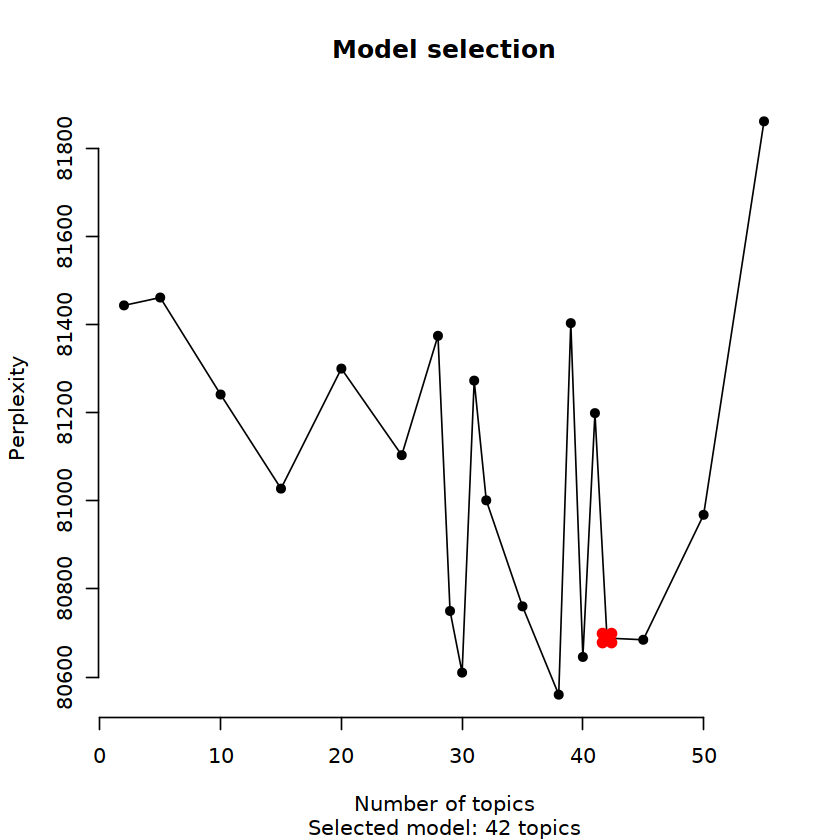

In [7]:
# Select the correct model for the number of topics
cisTopic_obj <- selectModel(cisTopic_obj, select = numTopics, type="maximum")
modelDims <- dim(cisTopic_obj@selected.model$topics)
print(paste("Selected model with", numTopics, "topics and matrix dimensions of", modelDims[1], "x", modelDims[2]))

In [121]:
# Save the cell probability matrix
cellMatrixPath <- file.path(outDir, paste0(dataset_name, ".cellMat.feather"))
cellMat <- modelMatSelection(cisTopic_obj, 'cell', 'Probability')
if (subset == TRUE) {
    cellMat <- cellMat[, cells]
}
cellMat <- as.data.frame(cellMat)
print(paste("Saving cell probability matrix with dimensions of", dim(cellMat)[1], "x", dim(cellMat)[2], "to", cellMatrixPath))
write_feather(cellMat, sink=file.path(outDir, paste0(dataset_name, ".cellMat.feather")))

[1] "Saving cell probability matrix with dimensions of 42 x 100 to /cellar/users/aklie/data/ml4gland/collabs/er_stress_regulation/test_script.cellMat.feather"


In [129]:
# Save the region counts
ctPath <- file.path(outDir, paste0(dataset_name, ".countMatrix.mtx"))
ct <- cisTopic_obj@count.matrix
if (subset == TRUE) {
    ct <- ct[, cells]
}
print(paste("Saving count matrix with dimensions of", dim(ct)[1], "x", dim(ct)[2], "to", ctPath))
Matrix::writeMM(ct, ctPath)

[1] "Saving count matrix with dimensions of 185580 x 100 to /cellar/users/aklie/data/ml4gland/collabs/er_stress_regulation/test_script.countMatrix.mtx"


NULL

In [26]:
# Save the cell metadata
print(paste("Saving cell metadata to", outDir))
if (subset == TRUE) {
    cellData <- cisTopic_obj@cell.data[cells, ]
} else {
    cellData <- cisTopic_obj.cell.data
}
write.table(cellData, file=file.path(outDir, paste0(dataset_name, ".cellData.tsv")), sep="\t", quote=FALSE)

---

# DONE!

# Scratch